In [1]:
import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models, Model
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import binarize
import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing.image import image, ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.utils import to_categorical
import functools
import keras

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__= 'top1_acc'

top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__= 'top5_acc'


base_dir = 'tensor_data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


model = models.Sequential()

for layer in vgg_conv.layers:
    layer.trainable = False

for layer in vgg_conv.layers:
    model.add(layer)
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

 
# Add new layers
model.add(Flatten(input_shape=(4,4,512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(47, activation='softmax',))
 
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc', top1_acc, top5_acc])
datagen = ImageDataGenerator(rescale=1. / 255) #rescale=1. / 255
datagen_valid = ImageDataGenerator(rescale=1. / 255) #rescale=1. / 255

train_generator = datagen.flow_from_directory(
        train_dir,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150),
    
)
 
validation_generator = datagen_valid.flow_from_directory(
        validation_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)

history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    steps_per_epoch=3,
                    validation_steps=1,
                    )


test_generator = datagen_valid.flow_from_directory(
        test_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150),
        batch_size=10,
        
)

from sklearn.preprocessing import label_binarize
predicted = model.predict_generator(test_generator, steps=1)
print(predicted.shape)
labeled = test_generator.labels[0:10]
print(labeled.shape)
cate = label_binarize(labeled,list(range(105)))

print(cate.shape)
acc = history.history['acc']

epochs = range(len(acc))

acc1 = history.history['top1_acc']
acc5 = history.history['top5_acc']
print(acc1)
print(acc5)
epochs = range(len(acc))

plt.plot(epochs, acc1, 'bo', label='top1')
plt.plot(epochs, acc5, 'r+', label='top5')
plt.title('top1 top5 accuracy')
plt.legend()

plt.figure()
plt.show()


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
<keras.engine.input_layer.InputLayer object at 0x7fce587b6f98> False
<keras.layers.convolutional.Conv2D object at 0x7fce17fc19e8> False
<keras.layers.convolutional.Conv2D object at 0x7fce17fc1b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7fce17fe6d68> False
<keras.layers.convolutional.Conv2D object at 0x7fce17fe6c18> False
<keras.layers.convolutional.Conv2D object at 0x7fce17f2cba8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fce17f5b630> False
<keras.layers.convolutional.Conv2D object at 0x7fce17f5b518> False
<keras.layers.convolutional.Conv2D object at 0x7fce17f102e8> False
<keras.layers.convolutional.Conv2D object at 0x7fce17f29908> False
<keras.layers.pooling.MaxPooling2D object at 0x7fce17ec3940> False
<keras.layers.convolutional.Conv2D object at 0x7fce17ec3b70> False
<keras.layers.convolutional.Conv2D object at 0x7fce17e77978> False
<keras.layers.convolutional.Conv2D object at 0x7fce17e8

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

[0.010416666666666666, 0.052083333333333336, 0.041666666666666664, 0.020833333333333332, 0.0625, 0.07291666666666667, 0.08333333333333333, 0.0625, 0.09375, 0.07291666666666667, 0.14583333333333334, 0.09375, 0.13541666666666666, 0.13541666666666666, 0.13541666666666666, 0.15625, 0.14583333333333334, 0.125, 0.17708333333333334, 0.21875, 0.14583333333333334, 0.20833333333333334, 0.20833333333333334, 0.11458333333333333, 0.2916666666666667, 0.22916666666666666, 0.25, 0.21875, 0.22916666666666666, 0.23958333333333334, 0.2708333333333333, 0.3020833333333333, 0.2708333333333333, 0.3020833333333333, 0.3229166666666667, 0.375, 0.375, 0.25, 0.3229166666666667, 0.375, 0.4479166666666667, 0.34375, 0.3541666666666667, 0.3333333333333333, 0.3333333333333333, 0.3645833333333333, 0.4166666666666667, 0.3541666666666667, 0.3645833333333333, 0.28125]
[0.10416666666666667, 0.16666666666666666, 0.13541666666666666, 0.1875, 0.16666666666666666, 0.25, 0.3229166666666667, 0.19791666666666666, 0.27083333333333

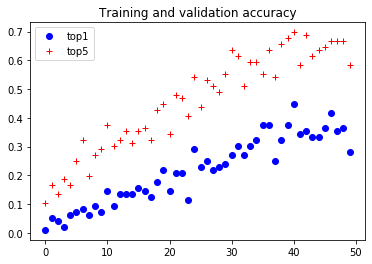

<Figure size 432x288 with 0 Axes>

In [2]:
#task1 plot
acc = history.history['acc']

acc1 = history.history['top1_acc']
acc5 = history.history['top5_acc']
print(acc1)
print(acc5)
epochs = range(len(acc))

plt.plot(epochs, acc1, 'bo', label='top1')
plt.plot(epochs, acc5, 'r+', label='top5')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()


In [1]:
# task 2
import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing.image import image, ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.utils import to_categorical
import functools
import keras

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__= 'top1_acc'

top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__= 'top5_acc'


base_dir = 'tensor_data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


model = models.Sequential()

for layer in vgg_conv.layers[:-2]:
    layer.trainable = False

for layer in vgg_conv.layers:
    model.add(layer)
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

 
# Add new layers
model.add(Flatten(input_shape=(4,4,512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(47, activation='softmax',))
 
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc', top1_acc, top5_acc])
datagen = ImageDataGenerator(rescale=1. / 255) #rescale=1. / 255
datagen_valid = ImageDataGenerator(rescale=1. / 255) #rescale=1. / 255

train_generator = datagen.flow_from_directory(
        train_dir,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150),
    
)
 
validation_generator = datagen_valid.flow_from_directory(
        validation_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)

history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    steps_per_epoch=3,
                    validation_steps=1,
                    )


test_generator = datagen_valid.flow_from_directory(
        test_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150),
        batch_size=10,
        
)

from sklearn.preprocessing import label_binarize
predicted = model.predict_generator(test_generator, steps=1)
print(predicted.shape)
labeled = test_generator.labels[0:10]
print(labeled.shape)
cate = label_binarize(labeled,list(range(105)))

print(cate.shape)
acc = history.history['acc']

epochs = range(len(acc))

acc1 = history.history['top1_acc']
acc5 = history.history['top5_acc']
print(acc1)
print(acc5)
epochs = range(len(acc))

plt.plot(epochs, acc1, 'bo', label='top1')
plt.plot(epochs, acc5, 'r+', label='top5')
plt.title('top1 top5 accuracy')
plt.legend()

plt.figure()
plt.show()



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
<keras.engine.input_layer.InputLayer object at 0x7f8430583908> False
<keras.layers.convolutional.Conv2D object at 0x7f83f6578cf8> False
<keras.layers.convolutional.Conv2D object at 0x7f83f6578e80> False
<keras.layers.pooling.MaxPooling2D object at 0x7f83f659bfd0> False
<keras.layers.convolutional.Conv2D object at 0x7f83f5ae25f8> False
<keras.layers.convolutional.Conv2D object at 0x7f83f5b0d278> False
<keras.layers.pooling.MaxPooling2D object at 0x7f83f5ab8898> False
<keras.layers.convolutional.Conv2D object at 0x7f83f5ab8400> False
<keras.layers.convolutional.Conv2D object at 0x7f83f5a6b4e0> False
<keras.layers.convolutional.Conv2D object at 0x7f83f5a82b38> False
<keras.layers.pooling.MaxPooling2D object at 0x7f83f5a35588> False
<keras.layers.convolutional.Conv2D object at 0x7f83f5a9cdd8> False
<keras.layers.convolutional.Conv2D object at 0x7f83f5a4fba8> False
<keras.layers.convolutional.Conv2D object at 0x7f83f59f

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

[0.020833333333333332, 0.0625, 0.11458333333333333, 0.09375, 0.16666666666666666, 0.16666666666666666, 0.22916666666666666, 0.21875, 0.17708333333333334, 0.34375, 0.3333333333333333, 0.2916666666666667, 0.3229166666666667, 0.3333333333333333, 0.3333333333333333, 0.34375, 0.4791666666666667, 0.46875, 0.3541666666666667, 0.4791666666666667, 0.40625, 0.4166666666666667, 0.4166666666666667, 0.5416666666666666, 0.6041666666666666, 0.4583333333333333, 0.5416666666666666, 0.53125, 0.5520833333333334, 0.5416666666666666, 0.40625, 0.4895833333333333, 0.5416666666666666, 0.5, 0.5833333333333334, 0.53125, 0.59375, 0.4895833333333333, 0.5416666666666666, 0.625, 0.4791666666666667, 0.5208333333333334, 0.6041666666666666, 0.5520833333333334, 0.59375, 0.5208333333333334, 0.625, 0.5729166666666666, 0.6770833333333334, 0.5833333333333334]
[0.09375, 0.16666666666666666, 0.22916666666666666, 0.3541666666666667, 0.3229166666666667, 0.3541666666666667, 0.4583333333333333, 0.4583333333333333, 0.416666666666

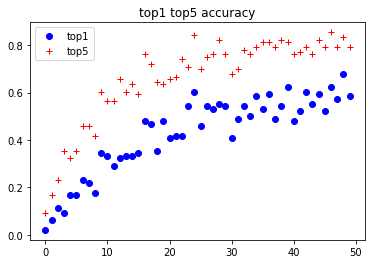

<Figure size 432x288 with 0 Axes>

In [2]:
epochs = range(len(acc))

acc1 = history.history['top1_acc']
acc5 = history.history['top5_acc']
print(acc1)
print(acc5)
epochs = range(len(acc))

plt.plot(epochs, acc1, 'bo', label='top1')
plt.plot(epochs, acc5, 'r+', label='top5')
plt.title('top1 top5 accuracy')
plt.legend()

plt.figure()
plt.show()


In [2]:
#task 3 train whole network
import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.layers import Flatten
import functools
import keras

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__= 'top1_acc'

top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__= 'top5_acc'

base_dir = 'tensor_data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    layer.trainable = False
    model.add(layer)


 
# Add new layers
model.add(Flatten(input_shape=(4,4,512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(105, activation='sigmoid',))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=0.0000001, ),
              loss='sparse_categorical_crossentropy',
              metrics=['acc', top1_acc, top5_acc])
datagen = ImageDataGenerator()
datagen_valid = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
        train_dir,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150)
)
 
validation_generator = datagen_valid.flow_from_directory(
        validation_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)
test_generator = datagen_valid.flow_from_directory(
        test_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)

history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    steps_per_epoch=1,
                    validation_steps=1,
                              verbose=1,
                    )

model.predict_generator(test_generator, steps=10)

#model.save('third_task.h5')


acc = history.history['acc']

acc1 = history.history['top1_acc']
acc5 = history.history['top5_acc']
print(acc1)
print(acc5)
epochs = range(len(acc))

plt.plot(epochs, acc1, 'bo', label='top1')
plt.plot(epochs, acc5, 'r+', label='top5')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       295168    
__________

ValueError: Error when checking target: expected dense_2 to have shape (105,) but got array with shape (48,)

[0.0, 0.03125, 0.0625, 0.07291666666666667, 0.03125, 0.020833333333333332, 0.03125, 0.041666666666666664, 0.0625, 0.020833333333333332, 0.0625, 0.041666666666666664, 0.07291666666666667, 0.041666666666666664, 0.09375, 0.07291666666666667, 0.07291666666666667, 0.0625, 0.07291666666666667, 0.07291666666666667, 0.125, 0.11458333333333333, 0.10416666666666667, 0.08333333333333333, 0.11458333333333333]
[0.08333333333333333, 0.11458333333333333, 0.13541666666666666, 0.16666666666666666, 0.11458333333333333, 0.13541666666666666, 0.20833333333333334, 0.21875, 0.23958333333333334, 0.15625, 0.23958333333333334, 0.16666666666666666, 0.20833333333333334, 0.17708333333333334, 0.2708333333333333, 0.3229166666666667, 0.3125, 0.20833333333333334, 0.2708333333333333, 0.23958333333333334, 0.3020833333333333, 0.2916666666666667, 0.2708333333333333, 0.3541666666666667, 0.3333333333333333]


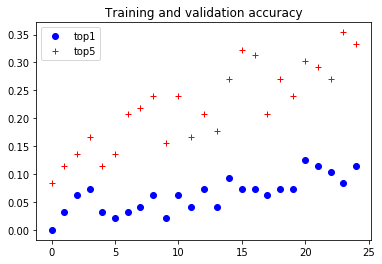

<Figure size 432x288 with 0 Axes>

In [2]:
acc1 = history.history['top1_acc']
acc5 = history.history['top5_acc']
print(acc1)
print(acc5)
epochs = range(len(acc))

plt.plot(epochs, acc1, 'bo', label='top1')
plt.plot(epochs, acc5, 'r+', label='top5')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()


<keras.engine.input_layer.InputLayer object at 0x7f78efb1dfd0> False
<keras.layers.convolutional.Conv2D object at 0x7f78efb28080> True
<keras.layers.convolutional.Conv2D object at 0x7f78efb28208> True
<keras.layers.pooling.MaxPooling2D object at 0x7f78edf54940> True
<keras.layers.convolutional.Conv2D object at 0x7f78edf544a8> True
<keras.layers.convolutional.Conv2D object at 0x7f78d859f588> True
<keras.layers.pooling.MaxPooling2D object at 0x7f78d85b6ba8> True
<keras.layers.convolutional.Conv2D object at 0x7f78d85b6710> True
<keras.layers.convolutional.Conv2D object at 0x7f78f45db668> True
<keras.layers.convolutional.Conv2D object at 0x7f78f45e8780> True
<keras.layers.pooling.MaxPooling2D object at 0x7f78ec0936a0> True
<keras.layers.convolutional.Conv2D object at 0x7f78ec0931d0> True
<keras.layers.convolutional.Conv2D object at 0x7f78edd44358> True
<keras.layers.convolutional.Conv2D object at 0x7f78edd69978> True
<keras.layers.pooling.MaxPooling2D object at 0x7f78ede53c18> True
<keras.

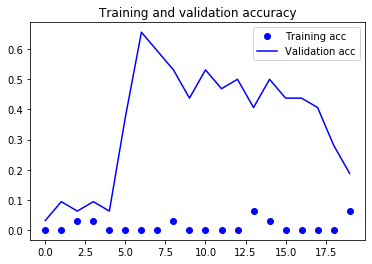

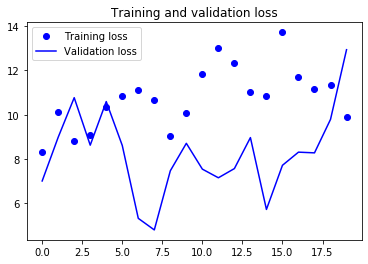

In [2]:
#task 3b
#simplify the network and train it once again

import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.layers import Flatten
import functools
import keras

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__= 'top1_acc'

top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__= 'top5_acc'

base_dir = 'tensor_data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


model = models.Sequential()

for l in vgg_conv.layers[0:(len(vgg_conv.layers)-1)]:
    model.add(l)
    
# Add new layers
model.add(Flatten(input_shape=(4,4,512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(105, activation='sigmoid',))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc', top1_acc, top5_acc])
datagen = ImageDataGenerator(rescale=1. / 255)
datagen_valid = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
        train_dir,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150),
    
)

 
validation_generator = datagen_valid.flow_from_directory(
        validation_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)
test_generator = datagen_valid.flow_from_directory(
        test_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)

history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    steps_per_epoch=1,
                    validation_steps=1,
                    )

model.predict_generator(test_generator, steps=10)

model.save('third_taskb.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
<keras.layers.convolutional.Conv2D object at 0x7f875021f2b0> True
<keras.layers.convolutional.Conv2D object at 0x7f875021f470> True
<keras.layers.pooling.MaxPooling2D object at 0x7f875024a588> True
<keras.layers.convolutional.Conv2D object at 0x7f875024ada0> True
<keras.layers.convolutional.Conv2D object at 0x7f87502006d8> True
<keras.layers.pooling.MaxPooling2D object at 0x7f8750199fd0> True
<keras.layers.convolutional.Conv2D object at 0x7f8750199be0> True
<keras.layers.convolutional.Conv2D object at 0x7f87501d09b0> True
<keras.layers.convolutional.Conv2D object at 0x7f8750164e48> True
<keras.layers.pooling.MaxPooling2D object at 0x7f875011ac50> True
<keras.layers.convolutional.Conv2D object at 0x7f875011a780> True
<keras.layers.convolutional.Conv2D object at 0x7f87501494a8> True
<keras.layers.convolu

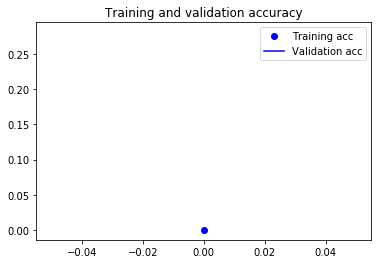

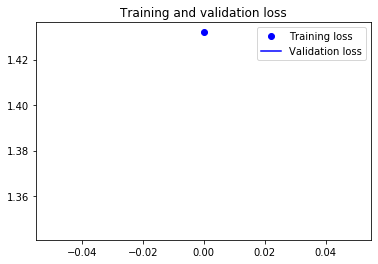

In [2]:
#task 4 svm with linear kernel (no densely connected layer)
import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.layers import Flatten
import functools
import keras
%matplotlib inline

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__= 'top1_acc'

top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__= 'top5_acc'

base_dir = 'tensor_data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()

for l in vgg_conv.layers[0:(len(vgg_conv.layers)-1)]:
    model.add(l)

model.add(Flatten(input_shape=(4,4,512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(47, activation='sigmoid',))

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)
    
    
# Show a summary of the model. Check the number of trainable parameters
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_hinge',
              metrics=['acc'])
datagen = ImageDataGenerator()
datagen_valid = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
        train_dir,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150),
)
 
validation_generator = datagen_valid.flow_from_directory(
        validation_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)
test_generator = datagen_valid.flow_from_directory(
        test_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)

history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=1,
                    steps_per_epoch=1,
                    validation_steps=1,
                    )

#preds = model.predict_generator(train_generator, 64)

#data_train_list = list(train_generator)
#print(data_train_list)
#print(preds.shape())
#print(preds)


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

kernels = ["linear", "rbf", "poly"]
    
train_generator_n = datagen.flow_from_directory(
        train_dir,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150)
)
 
validation_generator_n = datagen_valid.flow_from_directory(
        validation_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)
test_generator_n = datagen_valid.flow_from_directory(
        test_dir,
        class_mode='categorical',
        shuffle=False,
        target_size=(150,150)
)
    
intermediate_model = models.Model(inputs=model.input, outputs = model.layers[-1].output)
history_n = intermediate_model.predict_generator(train_generator_n, 256)
print(train_generator_n.classes.shape)
for kernel in kernels:
    print(kernel)
    sk_model = SVC(kernel=kernel, C=1e6, probability=True)
    sk_model.fit(history_n, train_generator_n.classes[:8192])
    x_test = intermediate_model.predict(test_generator_n, 256)
    y_pred = sk_model.predict(x_test,256)
    print(classification_report(test_generator_n.classes, y_pred))



Found 40934 images belonging to 47 classes.
Found 13674 images belonging to 47 classes.
Found 13676 images belonging to 47 classes.
(40934,)
linear
